In [344]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import chisquare
from scipy.interpolate import interp1d 
inter = interp1d

We will employ the Pearson Chi-Square test to show quantitatively that SN2007ld is better classified as a Type II P SN, rather thana Type Ia SN.

## Preparing Template Data

In [345]:
sn_template = pd.read_csv("sn2p_lc.v1.2.dat", delimiter="\s{1,}", header=None)

/Users/amyxiao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [346]:
sn_template.head()

,0,1
0,-11,26.00
1,-10,6.00
2,-5,1.04
3,0,0.00
4,5,0.21


In [347]:
sn_template_time = sn_template.iloc[:,0]
sn_template_mag = sn_template.iloc[:,1]

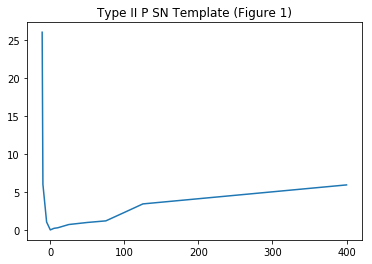

In [364]:
plt.title("Type II P SN Template (Figure 1)")
plt.plot(sn_template_time, sn_template_mag)

## Preparing SN2007ld Data

In [349]:
sn_curve = pd.read_csv("sn2007ld_photometry.csv")

In [350]:
sn_curve.head()

,event,time,magnitude,e_magnitude,upperlimit,band,instrument,telescope,source
0,SN2007ld,54346.159166,24.821,0.915,T,r',NaN,SDSS,2014arXiv1401.3317S
1,SN2007ld,54346.159166,24.821,0.803,T,r',NaN,SDSS,2010ApJ...708..661D
2,SN2007ld,54346.159995,23.993,0.871,T,i',NaN,SDSS,2014arXiv1401.3317S
3,SN2007ld,54346.159995,23.993,0.656,T,i',NaN,SDSS,2010ApJ...708..661D
4,SN2007ld,54346.160824,24.100,1.295,T,u',NaN,SDSS,2010ApJ...708..661D


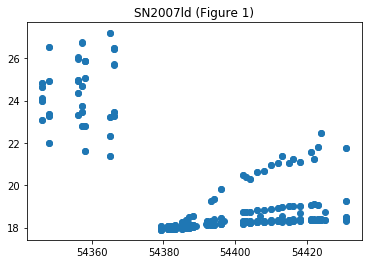

In [351]:
plt.title("SN2007ld (Figure 2)")
plt.scatter(sn_curve['time'], sn_curve['magnitude'])

In [352]:
sn_curve['band'].unique() # bands described in data

array(["r'", "i'", "u'", "z'", "g'", 'V'], dtype=object)

In [353]:
sn_vband = sn_curve[sn_curve['band'] == 'V'] # extract V band (since it's the only one given by template)
sn_vband_time = sn_vband['time']
sn_vband_mag = sn_vband['magnitude']

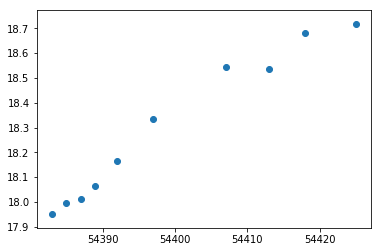

In [354]:
plt.scatter(sn_vband_time, sn_vband_mag)

## Fitting template data to SN2007ld V band data

In [355]:
# time
sn_t_max = sn_vband_time.max().max()
sn_t_min = sn_vband_time.min().min()

# V magnitudes
sn_mag_max = sn_vband_mag.max().max()
sn_mag_min = sn_vband_mag.min().min()

In [356]:
print (sn_t_min, sn_t_max)
print (sn_mag_min, sn_mag_max)

(54383.0, 54425.040000000001)
(17.949000000000002, 18.719000000000001)


In [357]:
print (sn_template_mag.min(), sn_template_mag.max())
print (sn_template_time.min(), sn_template_time.max())

(0.0, 26.0)
(-11, 400)


In [358]:
print (sn_mag_max - sn_mag_min) # range of v magnitudes
print (sn_t_max - sn_t_min) # range of time values

0.77
42.04


In [359]:
template_match_range = sn_template[(sn_template[0] >= 0)]
template_match_range

,0,1
3,0,0.00
4,5,0.21
5,10,0.28
6,25,0.71
7,50,0.98
8,75,1.19
9,100,2.30
10,125,3.42
11,400,5.92


In [360]:
mag_scale_fac = template_match_range[1].max()/0.77
mag_scale_fac

7.6883116883116882

In [361]:
time_scale_fac = template_match_range[0].max()/42.04
time_scale_fac

9.5147478591817318

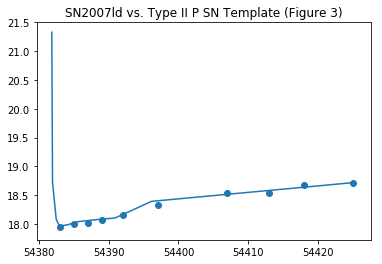

In [365]:
plt.title("SN2007ld vs. Type II P SN Template (Figure 3)")
plt.plot((sn_template_time/time_scale_fac) + sn_t_min, (sn_template_mag/mag_scale_fac)+sn_mag_min)
plt.scatter(sn_vband_time, sn_vband_mag)

## Determining Goodness of Fit

In [141]:
sn_vband_mag

98     17.949
109    17.995
130    18.012
151    18.062
152    18.163
189    18.333
230    18.546
261    18.538
292    18.683
339    18.719
Name: magnitude, dtype: float64

In [142]:
((sn_template_mag/mag_scale_fac)+sn_mag_min)[2:]

2     18.084270
3     17.949000
4     17.976314
5     17.985419
6     18.041348
7     18.076466
8     18.103780
9     18.248155
10    18.393831
11    18.719000
Name: 1, dtype: float64

In [367]:
chisquare(sn_vband_mag, ((sn_template_mag/mag_scale_fac)+sn_mag_min)[2:]) # II P p-value

Power_divergenceResult(statistic=0.025939374004370332, pvalue=0.99999999993908584)

### Comparing Against Type 1a Template

In [144]:
sn1a_template = pd.read_csv("sn1a_lc.v1.2.dat", delimiter="\s{1,}", header=None)

/Users/amyxiao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [173]:
sn1a_template_time = sn1a_template.iloc[1:,0]
sn1a_template_mag = sn1a_template.iloc[1:,3]

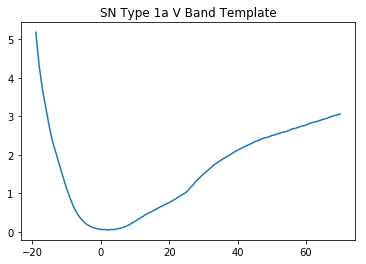

In [146]:
sn1a_template_mag
plt.title("SN Type 1a V Band Template")
plt.plot(sn1a_template_time, sn1a_template_mag)

In [158]:
sn1a_template_time_fac = sn1a_template_time.max()/42.04
sn1a_template_mag_fac = sn1a_template_mag.max()/0.77

In [318]:
sn1a_template_time_scaled = (sn1a_template_time/sn1a_template_time_fac) + sn_t_min
sn1a_template_time_scaled.head()

1    54371.589143
2    54372.189714
3    54372.790286
4    54373.390857
5    54373.991429
Name: 0, dtype: float64

In [325]:
sn1a_template_mag_scaled = (sn1a_template_mag/sn1a_template_mag_fac)+sn_mag_min
sn1a_template_mag.head()

1    5.18
2    4.30
3    3.67
4    3.19
5    2.71
Name: 3, dtype: float64

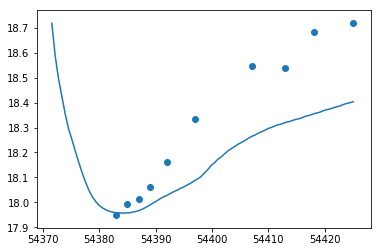

In [326]:
plt.plot(sn1a_template_time_scaled, sn1a_template_mag_scaled)
plt.scatter(sn_vband_time, sn_vband_mag)

In [335]:
sn_vband_time, sn_vband_mag

(98     54383.00
 109    54384.99
 130    54386.99
 151    54388.99
 152    54392.01
 189    54397.01
 230    54407.02
 261    54413.00
 292    54418.02
 339    54425.04
 Name: time, dtype: float64, 98     17.949
 109    17.995
 130    18.012
 151    18.062
 152    18.163
 189    18.333
 230    18.546
 261    18.538
 292    18.683
 339    18.719
 Name: magnitude, dtype: float64)

In [339]:
def find_template_mag_at_time(time):
    r = sn1a_template_time_scaled[(sn1a_template_time_scaled > (time - 1)) & (sn1a_template_time_scaled < (time + 1))]
    return sn1a_template_mag_scaled[r[abs(r - time) == abs(r - time).min()].index]

find_template_mag_at_time(54425.04)

90    18.403865
Name: 3, dtype: float64

In [340]:
f_vec = np.vectorize(find_template_mag_at_time)
f_vec(sn_vband_time)

array([ 17.95791892,  17.95791892,  17.96832432,  17.98913514,
        18.02778378,  18.08575676,  18.26413514,  18.32062162,
        18.35332432,  18.40386486])

In [366]:
chisquare(sn_vband_mag, f_vec(sn_vband_time)) # Ia p-value

Power_divergenceResult(statistic=0.023123654016389231, pvalue=0.99999999996363742)

### Analysis

We find that the p-value when comparing SN2007ld data against the SN Type Ia template and SN Type II P template to be very high in both cases. However, we know from visual inspection that it's most likely the case that SN2007ld should be classified as a Type II P Supernova.

Our analysis could be improved if we had template data for magnitudes other than the V band, as upon visual inspection of our data from SN2007ld (Figure 2), all the bands in general conform with the template provided for a SN Type II P (Figure 1).

Additionally, our fitting of our templates to our SN data could be improved. In particular, here, we first fit our Type II P SN template to our SN data, before using the same methodology to fit our Type Ia SN template to our SN data. This could have biased our fit towards the Type II P SN template, and improved the p-value.